In [2]:
cd /Users/jz-rolling/Desktop/OMEGA/Notebooks/MSR_manuscript_redo/

/Users/jz-rolling/Desktop/OMEGA/Notebooks/MSR_manuscript_redo


In [3]:
import numpy as np
import pickle as pk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as cl
from matplotlib.gridspec import GridSpec as gs
import networkx as nx
import seaborn as sns
import miniSAFE as ms
import OMEGA_core as om
from adjustText import adjust_text

In [4]:
# load dataframe
# load dataframe
df = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/rep1_spikein_curated.xls')

# load data
dest_folder = '/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/NMF_output/'
reshaped = np.load(dest_folder+'NMF_regrouped.npy')
h = np.load(dest_folder+'NMF_basis.npy')
w = np.load(dest_folder+'NMF_encoding.npy')
snf_data = pk.load(open('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/SNF_output/SNF_output.pk','rb'))
n_components = 20
positions = snf_data['positions']
g = snf_data['network']
pos = snf_data['embedding']
graph = snf_data['composite_graph']
func_tab = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/COG/func_annot.xlsx',index_col='Functional_category')



safe_dict = pk.load(open( "/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/SAFE/SAFE_dict.pk", "rb" ))
gematria_input = np.load('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/packed_rep1_spikein.npy')
graph_data = snf_data['composite_graph']

In [207]:
# process ribosomal proteins
"""

hentschel_ribo = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/Hentschel_etal_ribo.xlsx')
gff = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/start_over_once_more/references/Msm_gff.xlsx')
kegg = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/start_over_once_more/references/msm_kegg.xls')
go = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/start_over_once_more/references/msm_go.xls')


hentschel_ribo_entry = hentschel_ribo['Gene names  (ordered locus )'].values
hentschel_curated = []
for r in hentschel_ribo_entry:
    if ' ' in r:
        hentschel_curated.append(r.split(' ')[0])
    else:
        hentschel_curated.append(r)
        
gff_ribo_entry = []        
for i in range(len(gff)):
    if str(gff.iloc[i]['Name']).startswith('rps') or str(gff.iloc[i]['Name']).startswith('rpl'):
        gff_ribo_entry.append(i)
gff_ribo = list(gff.iloc[gff_ribo_entry]['Locus'])
GO_ribo = list(go.iloc[np.where(go.geneset=='ribosome')]['locus'].values)
kegg_ribo =  list(kegg.iloc[np.where(kegg.geneset==' Ribosome')]['locus'].values)
merged_ribo = list(set(hentschel_curated) | set(gff_ribo) | set(GO_ribo) |set(kegg_ribo))

# create a curated ribosomal geneset
gene_names = []
gene_products = []
msr_index = []
for r in merged_ribo:
    gene_names.append(gff[gff['Locus']==r]['Name'].values[0])
    gene_products.append(gff[gff['Locus']==r]['Product'].values[0])
    if r in df['locus'].values:
        msr_index.append(df[df['locus']==r].index[0])
    else:
        msr_index.append(-1)
ribo_source = np.zeros((len(merged_ribo),4))
for i in range(len(merged_ribo)):
    locus = merged_ribo[i]
    if locus in hentschel_curated:
        ribo_source[i,0] = 1
    if locus in gff_ribo:
        ribo_source[i,1] = 1
    if locus in GO_ribo:
        ribo_source[i,2] = 1
    if locus in kegg_ribo:
        ribo_source[i,3] = 1
        
curated_ribosomal_proteins = pd.DataFrame()
curated_ribosomal_proteins['MSR_index'] = msr_index
curated_ribosomal_proteins['locus'] = merged_ribo
curated_ribosomal_proteins['name'] = gene_names
curated_ribosomal_proteins['product'] = gene_products
curated_ribosomal_proteins[['Hentschel','Mycobrowser','GO','KEGG']] = ribo_source
curated_ribosomal_proteins.to_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/ribosomal_protein_multisource.xls',index=False)

# additional modifications were made manually

# rename ribo proteins
final_ribo_set = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/ribosomal_protein_multisource_manual_curation.xls',index_col='locus')
df_copy=df.copy()
filtered_df_copy = filtered_df.copy()
updated_df_names = list(df_copy['name'].values).copy()
updated_filtered_names = list(filtered_df_copy['name'].values).copy()

for i,locus in enumerate(df['locus'].values):
    if locus in final_ribo_set.index.values:
        name = final_ribo_set.loc[locus,'name']
        updated_df_names[i] = name
for i,locus in enumerate(filtered_df['locus'].values):
    if locus in final_ribo_set.index.values:
        name = final_ribo_set.loc[locus,'name']
        updated_filtered_names[i] = name
df_copy['name'] = updated_df_names
filtered_df_copy['name'] = updated_filtered_names
df_copy.to_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/rep1_spikein.xls')
filtered_df_copy.to_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/rep1_spikein_filtered.xlsx')
""";


In [5]:
final_ribo_set = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/ribosomal_protein_multisource_manual_curation.xls')
cog = pd.read_excel('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/references/COG/msm_cog_filtered.xls')
translation_set = cog[cog['Functional_category']=='J']

In [6]:
def single_geneset_enrichment(input_df,input_graph,geneset,edge_weight_percentage_cutoff=90,
                              input_locus_key = 'locus',geneset_locus_key='locus',pval_cutoff=0.05):
    
    from scipy import stats
    from statsmodels.stats.multitest import fdrcorrection
    locus_list = input_df['locus'].values
    target_list = geneset[input_locus_key].values
    overlap = np.intersect1d(locus_list,target_list)
    target_found = np.isin(locus_list, overlap)*1

    binary_graph = (graph_data>np.percentile(input_graph,
                                             edge_weight_percentage_cutoff))*1
    M=np.sum(np.ones(binary_graph.shape),axis=1)-1
    N=np.sum(binary_graph,axis=1)
    n=np.ones(len(target_found))*(target_found.sum())
    k=binary_graph.dot(target_found)
    fdr = fdrcorrection(stats.hypergeom.sf(k-1,M,n,N))
    enriched = np.where(fdr[1]<pval_cutoff)[0]
    neglog10 = -np.log10(fdr[1])
    return target_found, fdr, enriched, neglog10

def format_names(name_list):
    new_names = []
    for n in name_list:
        if n.startswith('MSMEG'):
            new_names.append(n.split('_')[1])
        elif n in ['mScarlet','mNeonGreen']:
            new_names.append(n)
        else:
            new_names.append(n[0].capitalize()+n[1:])
    return new_names


def zoom_in(x,y,xmin,xmax,ymin,ymax):
    return np.where((x>=xmin)&(x<xmax)&(y>=ymin)&(y<ymax))[0]

def sorted_barchart(ax,entry_list,
                    colors,
                    dataframe,
                    encoding_matrix,
                    feature_id):
    feature_mean = []
    feature_std = []
    labels = []
    for i in entry_list:
        d = encoding_matrix[i*10:i*10+10,feature_id]
        feature_mean.append(np.median(d))
        feature_std.append(d.std())
        labels.append(dataframe.iloc[i]['name'])
        
    feature_mean = np.array(feature_mean)
    feature_std = np.array(feature_std)
    labels = np.array(labels)
    ranks = np.argsort(feature_mean)
    for j in range(len(entry_list)):
        ax.bar(x=j+1,height=feature_mean[ranks[j]],fc=colors[ranks[j]])
        ax.text(x=j+1,y=feature_mean[ranks[j]]+0.001,s=labels[ranks[j]],
                rotation=90,va='bottom',ha='center')
    return ax,feature_mean

def significance_label(pval):
    label = ''
    if pval < 0.05:
        label = '*'
    if pval < 0.01:
        label = '**'
    if pval < 0.001:
        label = '***'
    if pval < 0.0001:
        label = '****'
    return label


NameError: name 'two_feature_scatterplot' is not defined

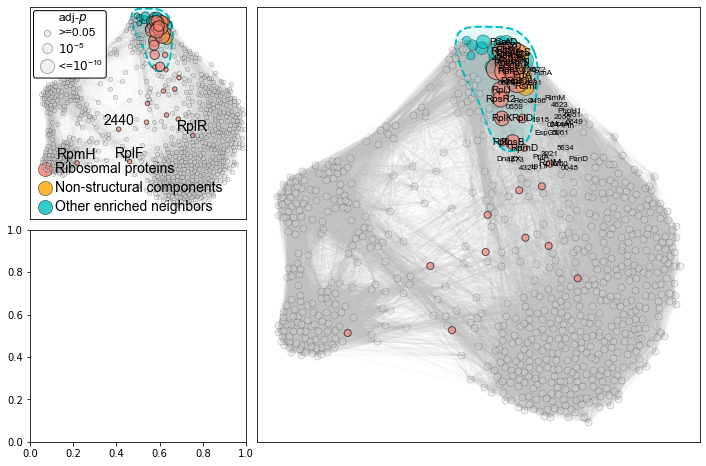

In [14]:
from matplotlib.patches import FancyBboxPatch

ribo_found=list(np.where(target_found==1)[0])
ribo_found+=[773,774,775,776,151,198]
colors = np.array([cl.to_rgba('salmon')]*target_found.sum()+\
                  [cl.to_rgba('c')]*6)
target_found, fdr, enriched, neglog10 = single_geneset_enrichment(df, 
                                                                  graph_data, 
                                                                  final_ribo_set,pval_cutoff=0.05,
                                                                  edge_weight_percentage_cutoff=99)
fig=plt.figure(figsize=(12,8))
grids = gs(2,3,wspace=0.05,hspace=0.05)
ax1 = fig.add_subplot(grids[0,0])
ax3 = fig.add_subplot(grids[1,0])
ax2 = fig.add_subplot(grids[:,1:])

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])



sizes = neglog10 / 10
sizes[sizes<-np.log10(0.05)/10] = 0.1
sizes[sizes>1]=1

edges = nx.draw_networkx_edges(g,pos=pos,edge_color='silver',alpha=0.1, width=0.05, ax=ax1)

enriched_neighbors = np.where((target_found==0)&(sizes>0.1))[0]
outgroup = np.where((target_found==0)&(sizes==0.1))

cog_translation=[]
remnant_enriched=[]
for e in enriched_neighbors:
    locus = str(df.iloc[e]['locus'])
    if locus in translation_set['locus'].values:
        cog_translation.append(e)
    else:
        remnant_enriched.append(e)
cog_translation=np.array(cog_translation)
remnant_enriched=np.array(remnant_enriched)

ax1.scatter(positions[0,remnant_enriched],positions[1,remnant_enriched],
            c='c',
            alpha=0.6,ec='black',lw=1,
            s=sizes[remnant_enriched]*200,zorder=2)

ax1.scatter(positions[0,cog_translation],positions[1,cog_translation],
            c='orange',
            alpha=0.6,ec='black',lw=1,
            s=sizes[cog_translation]*200,zorder=2)

ax1.scatter(positions[0,target_found==1],positions[1,target_found==1],
            c='salmon',
            alpha=0.6,ec='black',lw=1,
            s=sizes[target_found==1]*200,zorder=3)

ax1.scatter(positions[0,outgroup],positions[1,outgroup],
            c='lightgrey',
            alpha=0.3,ec='black',lw=0.5,
            s=20,zorder=2)

for r in np.where(target_found==1)[0]:
    if positions[1,r] < 0:
        name = df.iloc[r]['name']
        ax1.text(positions[0,r],positions[1,r]+0.01,format_names([name])[0],
                 fontname='Arial',fontsize=14,ha='center',va='bottom')
    
ax1 = ms.polygon_to_density(ax1,positions[0,sizes>0.1],positions[1,sizes>0.1],alpha_max=0.2,ngrid=100,
                            basecolor='c',outline_lw = 2,outline_ls='--',smooth_outline=10)
ax2 = ms.polygon_to_density(ax2,positions[0,sizes>0.1],positions[1,sizes>0.1],alpha_max=0.0,
                            ngrid=200,
                            basecolor='c',outline_lw = 2,outline_ls='--',smooth_outline=10)

#ax1.set_xlim(-1.1,0.8)
ax1.set_xlim(-1.1,0.8)
ax1.set_ylim(-0.75,0.95)
0.1
label_box = FancyBboxPatch((-1.05,0.4),height=0.5,width=0.6,boxstyle='Round,pad=0.02',
                           fc='white',ec='black',zorder=4)
ax1.add_artist(label_box)
ax1.text(-0.85,0.84,'adj-$\it{p}$',zorder=5,fontname='Arial',fontsize=12)

vals = [-np.log10(0.01)/10, -np.log10(0.00001)/10,-np.log10(0.0000000001)/10]
texts = ['>=0.05', '$10^\mathregular{-5}$','<=$10^\mathregular{-10}$']
labelsizes = np.array(vals)*200
for counter,y in enumerate([0.74,0.62,0.48]):
    ax1.scatter(-0.95,y,s=labelsizes[counter],fc='lightgrey', ec='black',lw=1,alpha=0.3,zorder=6)
    ax1.text(-0.85,y,'{}'.format(texts[counter]),ha='left',va='center',fontname='Arial',fontsize=12,zorder=6)
ax1.text(-0.88,-0.35,'Ribosomal proteins',fontname='Arial',fontsize=14,zorder=6,ha='left',va='center')
ax1.scatter(-0.97,-0.35,fc='salmon',s=200,ec='black',lw=0.5,alpha=0.8)
ax1.text(-0.88,-0.5,'Non-structural components',fontname='Arial',fontsize=14,zorder=6,ha='left',va='center')
ax1.scatter(-0.97,-0.5,fc='orange',s=200,ec='black',lw=0.5,alpha=0.8)
ax1.text(-0.88,-0.65,'Other enriched neighbors',fontname='Arial',fontsize=14,zorder=6,ha='left',va='center')
ax1.scatter(-0.97,-0.65,fc='c',s=200,ec='black',lw=0.5,alpha=0.8)

edges2 = nx.draw_networkx_edges(g,pos=pos,edge_color='silver',alpha=0.1, width=1,
                                ax=ax2)


cog_translation=[]
remnant_enriched=[]
for e in enriched_neighbors:
    locus = str(df.iloc[e]['locus'])
    if locus in translation_set['locus'].values:
        cog_translation.append(e)
    else:
        remnant_enriched.append(e)
cog_translation=np.array(cog_translation)
remnant_enriched=np.array(remnant_enriched)

ax2.scatter(positions[0,remnant_enriched],positions[1,remnant_enriched],
            c='c',
            alpha=0.6,ec='black',lw=0.5,
            s=sizes[remnant_enriched]*500,zorder=2)

ax2.scatter(positions[0,cog_translation],positions[1,cog_translation],
            c='orange',
            alpha=0.6,ec='black',lw=0.5,
            s=sizes[cog_translation]*500,zorder=2)

ax2.scatter(positions[0,target_found==1],positions[1,target_found==1],
            c='salmon',
            alpha=0.6,ec='black',lw=1,
            s=500*sizes[target_found==1],zorder=3)



ax2.scatter(positions[0,outgroup],positions[1,outgroup],
            c='lightgrey',
            alpha=0.3,ec='black',lw=0.5,
            s=50,zorder=2)

names=format_names(df['name'].values)
selected = zoom_in(positions[0],positions[1],-0.01,0.34,0.35,0.9)
for i in selected:
    x=positions[0,i]
    y=positions[1,i]
    s=names[i]
    if i in enriched or target_found[i]==1: 
        fontsize=10
    else:
        fontsize=8
    if s=='6288':
        x-=0.01
        y-=0.005
    ax2.annotate(s,(x,y),fontname='Arial',fontsize=fontsize,va='center',ha='center',
                 zorder=6)

ax3,ax3_data=two_feature_scatterplot(ax3,np.array(ribo_found),colors,df,w,[3,5],[1,2],label=False,
                                     text_opt=False)    
ax3labels = ax3_data[-1]
ax3labels = format_names(ax3labels)

offset=[(0,0.005),(0,-0.03),(0,-0.03),(0,0),(-0.015,-0.01),(0.01,0)]
offsetcounter=0
for i,label in enumerate(ax3labels):
    if not label.startswith('Rp'):
        dx,dy = offset[offsetcounter]
        tx,ty = ax3_data[0][i]+dx, ax3_data[1][i]+dy
        ax3.text(tx,ty,ax3labels[i],fontname='Arial',fontsize=14,va='bottom',ha='center')
        offsetcounter+=1
ax3.set_ylabel('membrane association\n(features 2 + 3)',fontname='Arial',fontsize=14)
ax3.set_xlabel('cell pole association\n(features 4 + 6)',fontname='Arial',fontsize=14)

ax2.set_xlim(0.02,0.34)
#ax2.set_ylim(0,0.9)
ax2.set_ylim(0.35,0.9)
#plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/figures/ribo_plots/ribo_temp.png',
#            dpi=100,bbox_inches='tight',transparent=True)

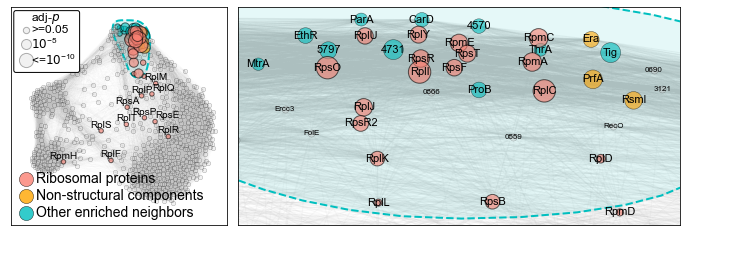

In [7]:
from matplotlib.patches import FancyBboxPatch

target_found, fdr, enriched, neglog10 = single_geneset_enrichment(df, 
                                                                  graph_data, 
                                                                  final_ribo_set,pval_cutoff=0.05,
                                                                  edge_weight_percentage_cutoff=99)
fig=plt.figure(figsize=(12,4))
grids = gs(2,3,wspace=0.05,hspace=0.05)
ax1 = fig.add_subplot(grids[:,0])
#ax3 = fig.add_subplot(grids[1,0])
ax2 = fig.add_subplot(grids[:,1:])

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])



sizes = neglog10 / 10
sizes[sizes<-np.log10(0.05)/10] = 0.1
sizes[sizes>1]=1

edges = nx.draw_networkx_edges(g,pos=pos,edge_color='silver',alpha=0.1, width=0.05, ax=ax1)

enriched_neighbors = np.where((target_found==0)&(sizes>0.1))[0]
outgroup = np.where((target_found==0)&(sizes==0.1))

cog_translation=[]
remnant_enriched=[]
for e in enriched_neighbors:
    locus = str(df.iloc[e]['locus'])
    if locus in translation_set['locus'].values:
        cog_translation.append(e)
    else:
        remnant_enriched.append(e)
cog_translation=np.array(cog_translation)
remnant_enriched=np.array(remnant_enriched)

ax1.scatter(positions[0,remnant_enriched],positions[1,remnant_enriched],
            c='c',
            alpha=0.6,ec='black',lw=1,
            s=sizes[remnant_enriched]*200,zorder=2)

ax1.scatter(positions[0,cog_translation],positions[1,cog_translation],
            c='orange',
            alpha=0.6,ec='black',lw=1,
            s=sizes[cog_translation]*200,zorder=2)

ax1.scatter(positions[0,target_found==1],positions[1,target_found==1],
            c='salmon',
            alpha=0.6,ec='black',lw=1,
            s=sizes[target_found==1]*200,zorder=3)

ax1.scatter(positions[0,outgroup],positions[1,outgroup],
            c='lightgrey',
            alpha=0.3,ec='black',lw=0.5,
            s=20,zorder=2)

for r in np.where(target_found==1)[0]:
    if positions[1,r] < 0.4:
        name = df.iloc[r]['name']
        if name in ['rplQ','rpsE']:
            ha='left'
        else:
            ha='center'
        ax1.text(positions[0,r],positions[1,r]+0.01,format_names([name])[0],
                 fontname='Arial',fontsize=10,ha=ha,va='bottom')
    
ax1 = ms.polygon_to_density(ax1,positions[0,sizes>0.1],positions[1,sizes>0.1],alpha_max=0.2,ngrid=100,
                            basecolor='c',outline_lw = 2,outline_ls='--',smooth_outline=10)
ax2 = ms.polygon_to_density(ax2,positions[0,sizes>0.1],positions[1,sizes>0.1],alpha_max=0.0,
                            ngrid=200,
                            basecolor='c',outline_lw = 2,outline_ls='--',smooth_outline=10)

ax1.set_xlim(-1.2,0.9)
ax1.set_ylim(-0.85,1.05)
0.1
label_box = FancyBboxPatch((-1.15,0.5),height=0.5,width=0.6,boxstyle='Round,pad=0.02',
                           fc='white',ec='black',zorder=4)
ax1.add_artist(label_box)
ax1.text(-1.0,0.93,'adj-$\it{p}$',zorder=5,fontname='Arial',fontsize=12)

vals = [-np.log10(0.01)/10, -np.log10(0.00001)/10,-np.log10(0.0000000001)/10]
texts = ['>=0.05', '$10^\mathregular{-5}$','<=$10^\mathregular{-10}$']
labelsizes = np.array(vals)*200
for counter,y in enumerate([0.85,0.73,0.59]):
    ax1.scatter(-1.05,y,s=labelsizes[counter],fc='lightgrey', ec='black',lw=1,alpha=0.3,zorder=6)
    ax1.text(-1,y,'{}'.format(texts[counter]),ha='left',va='center',fontname='Arial',fontsize=12,zorder=6)
ax1.text(-0.95,-0.45,'Ribosomal proteins',fontname='Arial',fontsize=14,zorder=6,ha='left',va='center')
ax1.scatter(-1.05,-0.45,fc='salmon',s=200,ec='black',lw=0.5,alpha=0.8)
ax1.text(-0.95,-0.6,'Non-structural components',fontname='Arial',fontsize=14,zorder=6,ha='left',va='center')
ax1.scatter(-1.05,-0.6,fc='orange',s=200,ec='black',lw=0.5,alpha=0.8)
ax1.text(-0.95,-0.75,'Other enriched neighbors',fontname='Arial',fontsize=14,zorder=6,ha='left',va='center')
ax1.scatter(-1.05,-0.75,fc='c',s=200,ec='black',lw=0.5,alpha=0.8)

edges2 = nx.draw_networkx_edges(g,pos=pos,edge_color='silver',alpha=0.1, width=1,
                                ax=ax2)


cog_translation=[]
remnant_enriched=[]
for e in enriched_neighbors:
    locus = str(df.iloc[e]['locus'])
    if locus in translation_set['locus'].values:
        cog_translation.append(e)
    else:
        remnant_enriched.append(e)
cog_translation=np.array(cog_translation)
remnant_enriched=np.array(remnant_enriched)

ax2.scatter(positions[0,remnant_enriched],positions[1,remnant_enriched],
            c='c',
            alpha=0.6,ec='black',lw=0.5,
            s=sizes[remnant_enriched]*500,zorder=2)

ax2.scatter(positions[0,cog_translation],positions[1,cog_translation],
            c='orange',
            alpha=0.6,ec='black',lw=0.5,
            s=sizes[cog_translation]*500,zorder=2)

ax2.scatter(positions[0,target_found==1],positions[1,target_found==1],
            c='salmon',
            alpha=0.6,ec='black',lw=1,
            s=500*sizes[target_found==1],zorder=3)



ax2.scatter(positions[0,outgroup],positions[1,outgroup],
            c='lightgrey',
            alpha=0.3,ec='black',lw=0.5,
            s=50,zorder=2)

names=format_names(df['name'].values)
selected = zoom_in(positions[0],positions[1],-0.06,0.15,0.35,0.9)
texts=[]
for i in selected:
    x=positions[0,i]
    y=positions[1,i]
    s=names[i]
    if i in enriched or target_found[i]==1: 
        fontweight ='bold'
        fontsize=11
    else:
        fontweight = 'normal'
        fontsize=8
    if s=='6288':
        x-=0.01
        y-=0.005
    texts.append(ax2.annotate(s,(x,y),fontname='Arial',fontsize=fontsize,va='center',ha='center', 
                 zorder=6))
    
ax2.set_xlim(-0.06,0.12)
ax2.set_ylim(0.42,0.9)
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ribo_plots/ribo_temp_trimmed.png',
            dpi=160,bbox_inches='tight',transparent=True)

In [9]:
len(target_found)

777

In [50]:
# create cluster concenus
ribostack = np.array([gematria_input[i,5,:] for i in np.where(target_found==1)[0]])
weightedstack = np.sum(ribostack*neglog10[target_found==1][:,np.newaxis],axis=0)
fig=plt.figure(figsize=(2,1))
plt.imshow(weightedstack.reshape(15,30),aspect='auto')
plt.axis('off')
#plt.title('weighted consensus\n(l=5)')
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ribo_plots/ribo_weighted_consensus.png',
            dpi=100,bbox_inches='tight',transparent=True)
plt.close()
for i in range(760,777):
    consensus = gematria_input[i,5,:].reshape(15,30)
    name = df.iloc[i]['name']
    fig=plt.figure(figsize=(2,1))
    plt.imshow(consensus,aspect='auto')
    plt.axis('off')
    #plt.title('weighted consensus\n(l=5)')
    plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ribo_plots/consensus_{}.png'.format(name),
                dpi=100,bbox_inches='tight',transparent=True)
    plt.close()

In [51]:
ribo_found=list(np.where(target_found==1)[0])
ribo_found+=[773,774,775,776,151,198]
colors = np.array([cl.to_rgba('salmon')]*target_found.sum()+\
                  [cl.to_rgba('c')]*6)
for i in range(20):
    fig=plt.figure(figsize=(8,4))
    ax=plt.subplot(111)
    ax,feature_mean=sorted_barchart(ax,np.array(ribo_found),colors,df,w,i)
    ax.set_ylim(0,feature_mean.max()+0.2*feature_mean.max())
    ax.set_xticks([])
    ax.set_ylabel('median weight')
    ax.set_title('Feature {}'.format(i+1))
    plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ribo_plots/ribo_features_{}.png'.format(i+1),
                 dpi=100,bbox_inches='tight',transparent=True)
    plt.close()

In [52]:
def two_feature_scatterplot(ax,entry_list,
                            colors,
                            dataframe,
                            encoding_matrix,
                            id1,id2,text_opt = False,label=False,exclude='rp'):
    from adjustText import adjust_text
    d1medians=[]
    d2medians=[]
    d1stds=[]
    d2stds=[]
    labels=[]
    for i in entry_list:
        feature_mean=[]
        feature_std=[]
        d1 = np.sum(encoding_matrix[i*10:i*10+10,np.array(id1)],axis=1)
        d2 = np.sum(encoding_matrix[i*10:i*10+10,np.array(id2)],axis=1)
        d1medians.append(np.median(d1))
        d1stds.append(np.std(d1))
        d2medians.append(np.median(d2))
        d2stds.append(np.std(d2))
        labels.append(dataframe.iloc[i]['name'])
    ax.scatter(d1medians,d2medians,fc=colors,alpha=0.5,ec='black',lw=1,s=200)
    labels=format_names(labels)
    texts = []
    if label:
        for i,name in enumerate(labels):
            if not name.startswith(exclude):
                texts.append(ax.text(d1medians[i],d2medians[i],labels[i],ha='center',va='bottom',
                                     fontsize=14))
    if text_opt:
        adjust_text(texts,arrowprops=dict(arrowstyle='-', color='black'))
    return ax, [d1medians,d2medians,d1stds,d2stds,labels]

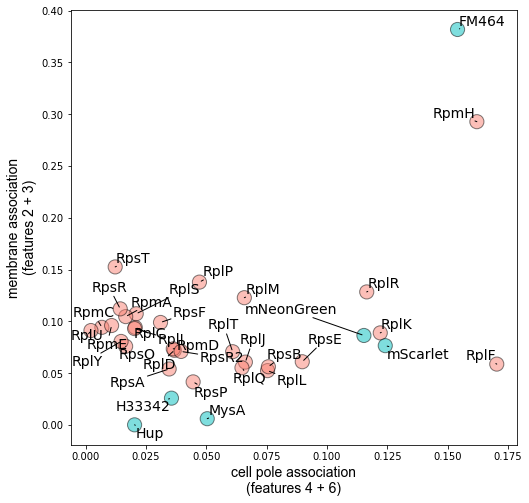

In [54]:
fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111)
ax,_d=two_feature_scatterplot(ax,np.array(ribo_found),colors,df,w,[3,5],[1,2],text_opt=True,label=True,exclude='RR')
ax.set_ylabel('membrane association\n(features 2 + 3)',fontname='Arial',fontsize=14)
ax.set_xlabel('cell pole association\n(features 4 + 6)',fontname='Arial',fontsize=14)
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ribo_plots/ribo_feature_scatter_1.png',
            dpi=100,bbox_inches='tight',transparent=True)

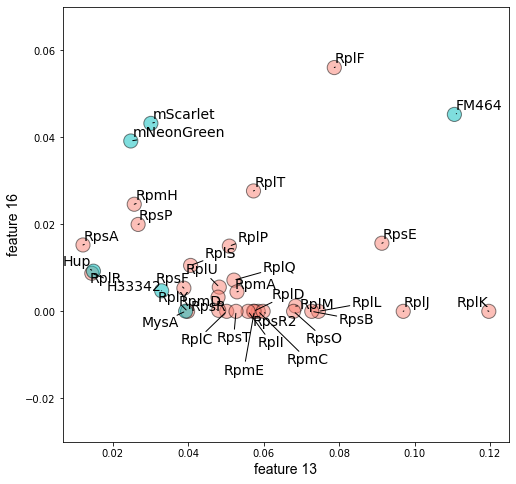

In [57]:
fig=plt.figure(figsize=(8,8))
ax=plt.subplot(111)
ax.set_ylim(-0.03,0.07)
ax,_d=two_feature_scatterplot(ax,np.array(ribo_found),colors,df,w,[12],[15],text_opt=True,label=True,exclude='RR')
ax.set_xlabel('feature 13',fontname='Arial',fontsize=14)
ax.set_ylabel('feature 16',fontname='Arial',fontsize=14)
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ribo_plots/ribo_feature_scatter_2.png',
            dpi=100,bbox_inches='tight',transparent=True)

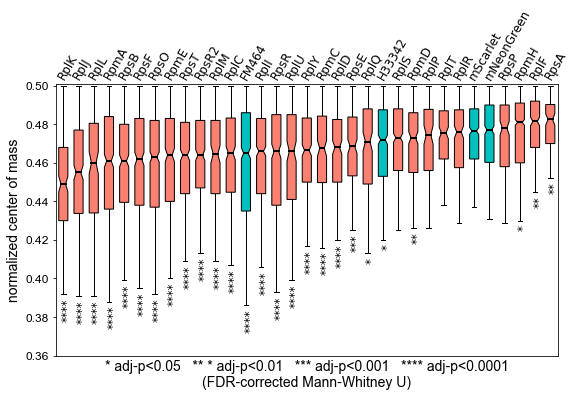

In [64]:
# process_asymmetry
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection
symmetry = pk.load(open('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/center_of_mass.pk','rb'))
sym_mean = []
sym_std = []
labels = []

fig = plt.figure(figsize=(9,5))
ax=plt.subplot(111)
for i in ribo_found[:-2]:
    key = df.iloc[i]['key']
    name = df.iloc[i]['name']
    if key == 'MSR_05_A01_MSMEG_2440':
        sym = symmetry['MSR_05_A01_MSMEG_2240']
    else:
        sym = symmetry[key]
    sym_mean.append(np.median(sym))
    sym_std.append(sym.std())
    labels.append(df.iloc[i]['name'])
labels = format_names(labels)
sym_mean = np.array(sym_mean)
sym_std = np.array(sym_std)
ranks = np.argsort(sym_mean)
control_data = symmetry[df.iloc[774]['key']]
mwu_ps = []
for i in ribo_found:
    key = df.iloc[i]['key']
    if key == 'MSR_05_A01_MSMEG_2440':
        sym = symmetry['MSR_05_A01_MSMEG_2240']
    else:
        sym = symmetry[key]
    mwu_ps.append(stats.mannwhitneyu(sym,control_data)[1])
mwu_adj = fdrcorrection(mwu_ps)[1]


for i in range(len(ranks)):
    key = df.iloc[ribo_found[ranks[i]]]['key']
    if key == 'MSR_05_A01_MSMEG_2440':
        sym = symmetry['MSR_05_A01_MSMEG_2240']
    else:
        sym = symmetry[key]
    strain_data=sym
    pc = plt.boxplot(x=strain_data,whis=1,
                     notch=True,  # notch shape
                     vert=True, 
                     medianprops={'color':'black','linewidth':2},
                     widths=0.6,showfliers=False,patch_artist=True,
                     positions=[i+1],boxprops={'facecolor':colors[ranks[i]],
                                               'edgecolor':'black'})
    plt.text(x=i+0.5,y=0.502,s=labels[ranks[i]],
             rotation=60,va='bottom',ha='left',fontsize=12)
    bot = pc['whiskers'][0].get_data()[1][1]
    mwu = stats.mannwhitneyu(strain_data,control_data)
    mwu_p = mwu[1]
    plt.text(x=i+1.25,y=bot-0.002,s=significance_label(mwu_adj[ranks[i]]),
             rotation=90,va='top',ha='center',fontsize=12)
ax.set_xticks([])
ax.set_yticks([0.36,0.38,0.40,0.42,0.44,0.46,0.48,0.50])
ax.set_yticklabels(['0.36','0.38','0.40','0.42','0.44','0.46','0.48','0.50'],fontname='Arial',fontsize=12)
ax.set_ylim(0.36,0.501)
ax.set_ylabel('normalized center of mass',fontname='Arial',fontsize=14)
ax.set_xlabel('* adj-p<0.05   ** * adj-p<0.01   *** adj-p<0.001   **** adj-p<0.0001\n(FDR-corrected Mann-Whitney U)',fontname='Arial',fontsize=14)
plt.savefig('/Users/jz-rolling/Desktop/MSR_OMEGA_manuscript/Another_try/revision_1/figures/ribo_plots/ribo_asymmetry.png',
            dpi=100,bbox_inches='tight',transparent=True)